# Import imp linraies 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression

# Load the data set .

In [2]:
df = pd.read_csv('/Users/jayasinha/Downloads/YourCabs_training.csv')
df.head(1)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,1.0


In [3]:
# check null values .

df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

# Data cleaning . 



-  Drop the columan which are not required .

In [4]:
df.drop(['id','user_id','vehicle_model_id','to_date','package_id','from_city_id','to_city_id','to_date','Cost_of_error'],axis='columns',inplace=True)
#Dropping Identity columns
#Dropping on null percentage >40
#Dropping to_area_id as of no scope

In [5]:
# Check for null values 
df.isnull().sum()

travel_type_id            0
from_area_id             88
to_area_id             9138
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 9138
to_long                9138
Car_Cancellation          0
dtype: int64

# Data Transforming .

In [6]:
# Filing from_area_id and to_area_id with mode values 
mode_AreaId = df['from_area_id'].mode()
df['from_area_id'] = df['from_area_id'].fillna(393.0)
df['to_area_id'].mode()
df['to_area_id'] = df['to_area_id'].fillna(393.0)

df['from_lat'].mode()
df['from_lat'] = df['from_lat'].fillna(13.19956)

df['from_long'].mode()
df['from_long'] = df['from_long'].fillna(77.70688)


In [7]:
# Filling out the median values to_lat and to_long for the null values .

df['to_lat']=df['to_lat'].fillna(df.groupby(['to_area_id'])['to_lat'].transform('median'))
df['to_long']=df['to_long'].fillna(df.groupby(['to_area_id'])['to_long'].transform('median'))


df['from_lat']=df['from_lat'].fillna(df.groupby(['from_area_id'])['from_lat'].transform('median'))
df['from_long']=df['from_long'].fillna(df.groupby(['from_area_id'])['from_long'].transform('median'))



In [8]:
df.isnull().sum()

travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

- Extracting date from the date and time .

In [9]:
## Extracting date from the date and time .
# converted the object data type to dtype: datetime64[ns]
df['from_date'] = pd.to_datetime(df['from_date'])
## Extracting date from the date and time .
df['from_date_day_name'] = df['from_date'].dt.day_name()
## Extracting date from the time .
df['from_date_time'] = pd.to_datetime(df.from_date, format='%Y-%m-%d %H:%M:%S')
df['from_date_time']=df['from_date'].dt.strftime('%H:%M:%S')
df.head(1)

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day_name,from_date_time
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0,Tuesday,02:00:00


In [10]:
# Group time range 

df['period_from_date']= (df['from_date'].dt.hour%24+4)//4
df['period_from_date'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

- Extracting date from the time from booking created .

In [11]:
## Extracting date from the time from booking created 

df['booking_created'] = pd.to_datetime(df.from_date, format='%Y-%m-%d %H:%M:%S')
df['booking_created_time']=df['booking_created'].dt.strftime('%H:%M:%S')

df['period_booking_created']= (df['booking_created'].dt.hour%24+4)//4
df['period_booking_created'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df['booking_created_day'] = df['booking_created'].dt.day_name()



In [12]:
df.head(1)

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day_name,from_date_time,period_from_date,booking_created_time,period_booking_created,booking_created_day
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 02:00:00,12.92415,77.67229,12.92732,77.63575,0,Tuesday,02:00:00,Late Night,02:00:00,Late Night,Tuesday


- difference btween booking date and from date  

In [13]:
df['difference']=pd.to_datetime(df['booking_created_time'])-pd.to_datetime(df['from_date_time'])
df['difference_min ']=df['difference']/np.timedelta64(1,'m')

In [14]:
df.head()

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day_name,from_date_time,period_from_date,booking_created_time,period_booking_created,booking_created_day,difference,difference_min
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 02:00:00,12.924150,77.672290,12.927320,77.635750,0,Tuesday,02:00:00,Late Night,02:00:00,Late Night,Tuesday,0 days,0.0
1,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 09:00:00,12.966910,77.749350,12.927680,77.626640,0,Tuesday,09:00:00,Morning,09:00:00,Morning,Tuesday,0 days,0.0
2,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:30:00,12.937222,77.626915,13.047926,77.597766,0,Tuesday,03:30:00,Late Night,03:30:00,Late Night,Tuesday,0 days,0.0
3,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 05:45:00,12.989990,77.553320,12.971430,77.639140,0,Tuesday,05:45:00,Early Morning,05:45:00,Early Morning,Tuesday,0 days,0.0
4,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 09:00:00,12.845653,77.677925,12.954340,77.600720,0,Tuesday,09:00:00,Morning,09:00:00,Morning,Tuesday,0 days,0.0


- Distances btween starting point and ending point .

In [15]:
from math import radians, cos, sin, asin, sqrt

In [16]:
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [17]:
for i in range(0,len(df)):
    dist=distance(df.loc[i,'from_lat'],
                  df.loc[i,'to_lat'],
                  df.loc[i,'from_long'],
                  df.loc[i,'to_long'])
    df.loc[i,'Distance_Km']=dist

In [18]:
df.head(1)

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,...,Car_Cancellation,from_date_day_name,from_date_time,period_from_date,booking_created_time,period_booking_created,booking_created_day,difference,difference_min,Distance_Km
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 02:00:00,12.92415,77.67229,12.92732,...,0,Tuesday,02:00:00,Late Night,02:00:00,Late Night,Tuesday,0 days,0.0,3.975764


In [19]:
# Remove the columan which has been transform .
df.drop(['from_lat','from_long','to_lat','to_long','difference','from_date','booking_created','from_date_time','booking_created_time'],axis='columns',inplace=True)


## Divided the cancealtion in low and high range .

In [20]:
y = df[['from_area_id','Car_Cancellation']].copy() # made new data farme for easy calculation .
y['count cancealtion']=y.loc[y['Car_Cancellation']==1].groupby('from_area_id').transform('count')
y['count cancealtion']=y['count cancealtion'].fillna(0)
y['sum_per_areaid']=df.groupby('from_area_id')['from_area_id'].transform('count')

In [21]:
# y['count cancealtion%']=round((y['count cancealtion']/len(df))*100,2)
y['count cancealtion%']=round((y['count cancealtion']/y['sum_per_areaid'])*100,2)

In [22]:
y['count cancealtion%']=y['count cancealtion%'].apply(lambda x :'Low' if x < 33.3 
                                                                                 else ('Medium' if x < 66.6  else 'High'))

In [23]:
#y['count cancealtion'].sum(axis = 0, skipna = True)

In [24]:
y.loc[y['count cancealtion%']=='High']

,from_area_id,Car_Cancellation,count cancealtion,sum_per_areaid,count cancealtion%
2252,130.0,1,4.0,5,High
12938,130.0,1,4.0,5,High
14433,130.0,1,4.0,5,High
15336,130.0,1,4.0,5,High
15987,630.0,1,2.0,3,High
16668,1174.0,1,2.0,3,High
34763,138.0,1,1.0,1,High
34856,1174.0,1,2.0,3,High
38311,630.0,1,2.0,3,High
41012,1148.0,1,2.0,3,High


In [25]:
df['from_area_id'] = y['count cancealtion%']

In [26]:
df.head(1)

,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_day_name,period_from_date,period_booking_created,booking_created_day,difference_min,Distance_Km
0,2,Low,448.0,0,0,0,Tuesday,Late Night,Late Night,Tuesday,0.0,3.975764


## Data encoding for trave id 

In [27]:
traveltype = pd.get_dummies(df['travel_type_id'],drop_first=True)
traveltype.head()
#One Hot Encoding if number of distinct values is more than 5
#Label Encoding if number of distinct values is less than 5

,2,3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
df = pd.concat([traveltype,df],axis=1)
df = df.drop(['travel_type_id'],axis=1)

## Data Visualization

In [29]:
df['from_area_id'].value_counts()

Low       43333
Medium       87
High         11
Name: from_area_id, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2                       43431 non-null  uint8  
 1   3                       43431 non-null  uint8  
 2   from_area_id            43431 non-null  object 
 3   to_area_id              43431 non-null  float64
 4   online_booking          43431 non-null  int64  
 5   mobile_site_booking     43431 non-null  int64  
 6   Car_Cancellation        43431 non-null  int64  
 7   from_date_day_name      43431 non-null  object 
 8   period_from_date        43431 non-null  object 
 9   period_booking_created  43431 non-null  object 
 10  booking_created_day     43431 non-null  object 
 11  difference_min          43431 non-null  float64
 12  Distance_Km             43431 non-null  float64
dtypes: float64(3), int64(3), object(5), uint8(2)
memory usage: 3.7+ MB


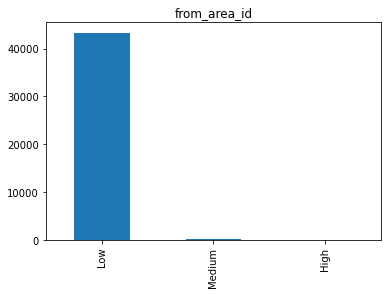

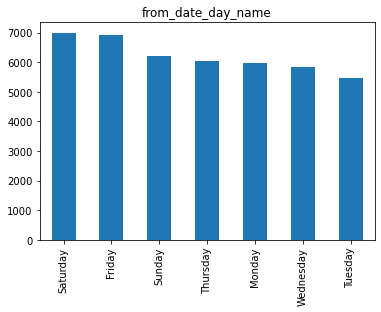

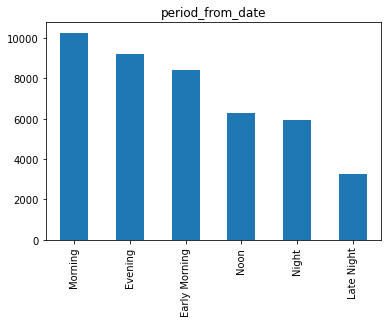

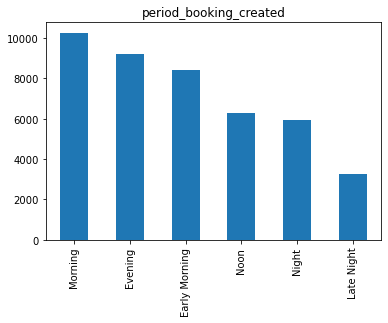

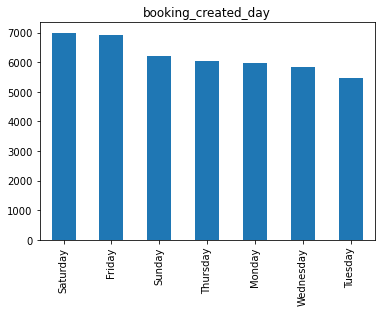

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

In [32]:
char = df.select_dtypes(include='object')
num = df.select_dtypes(include='number')

In [33]:
char.head()

,from_area_id,from_date_day_name,period_from_date,period_booking_created,booking_created_day
0,Low,Tuesday,Late Night,Late Night,Tuesday
1,Low,Tuesday,Morning,Morning,Tuesday
2,Low,Tuesday,Late Night,Late Night,Tuesday
3,Low,Tuesday,Early Morning,Early Morning,Tuesday
4,Low,Tuesday,Morning,Morning,Tuesday


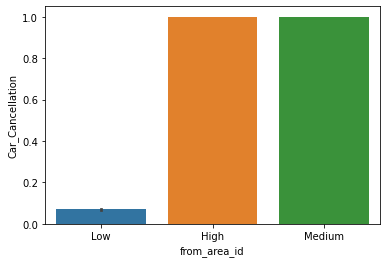

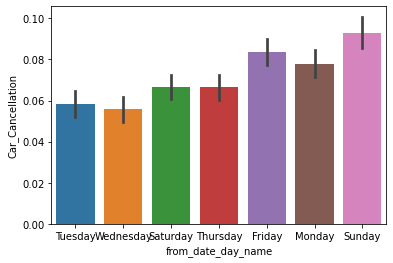

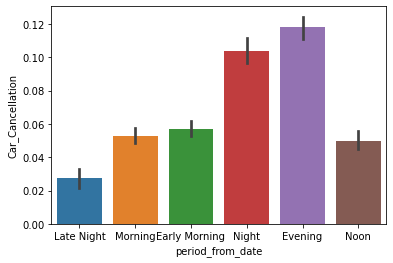

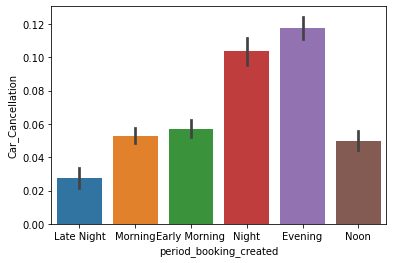

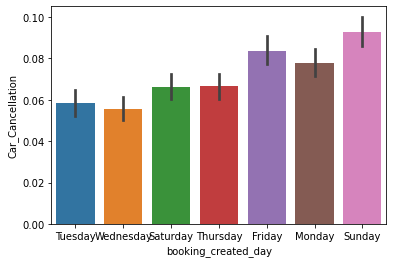

In [34]:
from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col,y=df['Car_Cancellation'],data=df,estimator=mean)
plt.show()

##  Data encoding .

In [35]:
char=pd.get_dummies(char, drop_first = True)

In [36]:
char.shape

(43431, 24)

In [37]:
df_new = pd.concat([num,char],axis=1,join='inner')
df_new.shape

(43431, 32)

In [38]:
df_new.head()

,2,3,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,difference_min,Distance_Km,from_area_id_Low,from_area_id_Medium,...,period_booking_created_Late Night,period_booking_created_Morning,period_booking_created_Night,period_booking_created_Noon,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday
0,1,0,448.0,0,0,0,0.0,3.975764,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,540.0,0,0,0,0.0,13.995033,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,1034.0,0,0,0,0.0,12.708414,1,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,398.0,0,0,0,0.0,9.525153,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,849.0,0,0,0,0.0,14.699782,1,0,...,0,1,0,0,0,0,0,0,1,0


In [39]:
df_new.drop(['to_area_id'],axis='columns',inplace=True)

- divied the the data into features and target varable 



In [40]:
x= df_new.drop(['Car_Cancellation'],axis='columns')
y= df_new[['Car_Cancellation']]

In [41]:
x.head()


,2,3,online_booking,mobile_site_booking,difference_min,Distance_Km,from_area_id_Low,from_area_id_Medium,from_date_day_name_Monday,from_date_day_name_Saturday,...,period_booking_created_Late Night,period_booking_created_Morning,period_booking_created_Night,period_booking_created_Noon,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday
0,1,0,0,0,0.0,3.975764,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.0,13.995033,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0.0,12.708414,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0.0,9.525153,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0.0,14.699782,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
y.head()


,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


## Train validation Split .

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# X_train.shape ,X_test.shape, y_train.shape, y_test.shape 

## 6. Ensemble Learning Models

- Logistic Regression, Random Forest Classifier, Bagging Classifier and Support Vector Machine are used vote with Voting Classifier, hard voting is made. This model is used to fit and predict data in the following sections.

In [44]:
# lr = LogisticRegression()
# rf = RandomForestClassifier(n_estimators=10)
# bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5)
# clf = SVC(kernel = 'linear')

# evc = VotingClassifier(estimators =[('lr', lr),('rf', rf),('bg', bg),('clf', clf)], 
#                        voting = 'hard')

In [ ]:
# evc.fit(x_train, y_train)

# predicted_data = evc.predict(x_test)
# print ('Score of the Model:')
# print (evc.score(x_test, y_test))
# print ('Confusion Matrix:')
# print (confusion_matrix(x_test, predicted_data))

In [94]:
# rf = RandomForestClassifier()
# rf.fit(x.values, y.values.ravel())

# importance = rf.feature_importances_
# importance = pd.DataFrame(importance, index = x.columns, columns=['Importance'])

# feats = {}
# for feature, importance in zip(x.columns,rf.feature_importances_):
#     feats[feature] = importance
    
# print (feats)
# importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 
#                                                                             'Gini-importance'})
# importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

# Trying diffrent model 

In [63]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(x_train,y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [50]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [51]:
gscv_dtc.best_params_  # best parametesrs 

{'max_depth': 3, 'min_samples_split': 50}

In [52]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [57]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [58]:
gscv_rfc.best_params_

{'max_depth': 6, 'min_samples_split': 50}

In [59]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=6,min_samples_split=50)
rfc.fit(x_train,y_train)

<ipython-input-59-3a6e276d3048>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=4)

## Model Evaluation .

In [65]:
y_pred_lr=lr.predict(x_test)
y_pred_dtc=dtc.predict(x_test)
y_pred_rfc=rfc.predict(x_test)

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision",metrics.precision_score(y_test,y_pred_lr))
print("Recall"metrics.plot_confusion_matrix(dtc,X_val,y_val),metrics.recall_score(y_test,y_pred_lr))
print("f1_score",metrics.f1_score(y_test,y_pred_lr))

Accuracy: 0.9304681504221028
Precision 1.0
Recall 0.033084311632870865
f1_score 0.0640495867768595


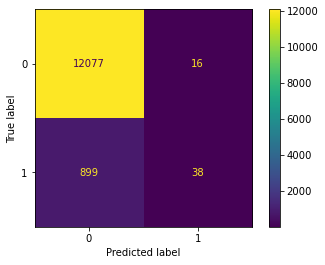

In [69]:
metrics.plot_confusion_matrix(dtc,x_test,y_test)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dtc))
print("Precision",metrics.precision_score(y_test,y_pred_dtc))
print("Recall",metrics.recall_score(y_test,y_pred_dtc))
print("f1_score",metrics.f1_score(y_test,y_pred_dtc))

Accuracy: 0.929777436684574
Precision 0.7037037037037037
Recall 0.04055496264674493
f1_score 0.07669021190716446


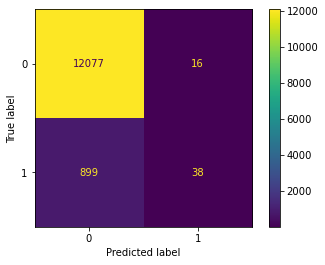

In [72]:
metrics.plot_confusion_matrix(dtc,x_test,y_test)

Accuracy: 0.9305448963929394
Precision 1.0
Recall 0.03415154749199573
f1_score 0.06604747162022703


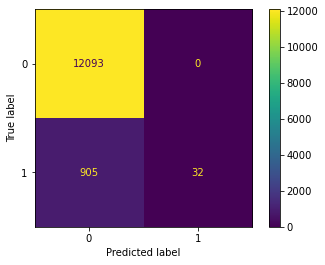

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision",metrics.precision_score(y_test,y_pred_rfc))
print("Recall",metrics.recall_score(y_test,y_pred_rfc))
print("f1_score",metrics.f1_score(y_test,y_pred_rfc))

metrics.plot_confusion_matrix(rfc,x_test,y_test)